Smote technique to optimize imbalanced data set

· Baseline classification model – logistic regression & K-nearest

· XG-Boost model – tune parameters via grid search

· Lean into imbalance data set thing and anomaly detection

Anomaly detection ideas:

- Auto encoder
- DB scan


· Maybe correlate time feature

In [110]:
# pip install opendatasets

import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split

# %matplotlib
pd.set_option('display.max_columns', None)

### Load Data 

- retreived from kaggle portal
- File too large to store in github

In [111]:
dataset_url="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data"

od.download(dataset_url)

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [112]:
data_dir = "creditcardfraud"

os.listdir(data_dir)

['creditcard.csv']

In [113]:
creditcard=data_dir + "/creditcard.csv"
data = pd.read_csv(creditcard)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [115]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [116]:
prop = 492/ 284315
round(prop, 3)

0.002

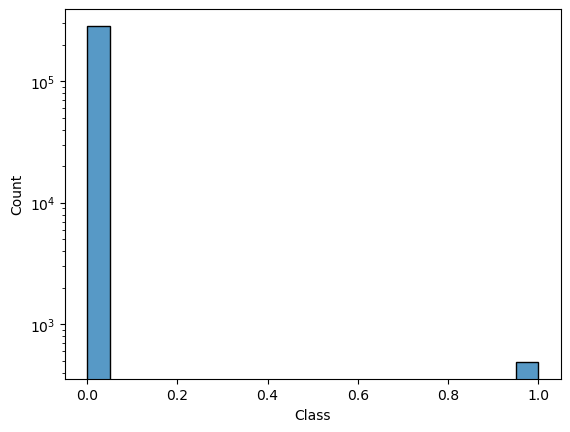

In [117]:
#data imbalance
sns.histplot(data['Class'])
plt.yscale('log')
plt.show()


In [118]:
data.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Class'>

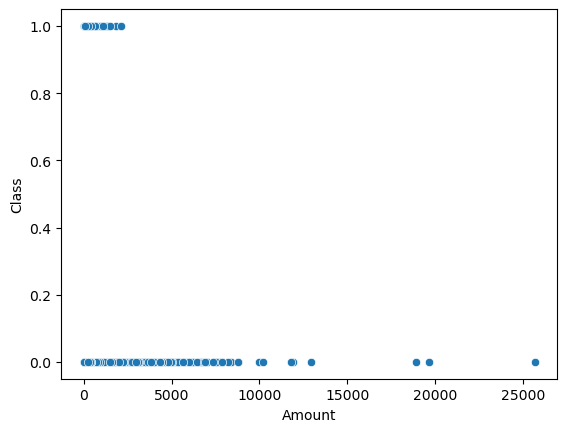

In [119]:
amountClass = data[["Amount", "Class"]]
sns.scatterplot(amountClass, x = "Amount", y= "Class")

In [120]:
amountClass[amountClass.Class==1].Amount.max()

2125.87

In [121]:
amountClass[amountClass.Class==0].Amount

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


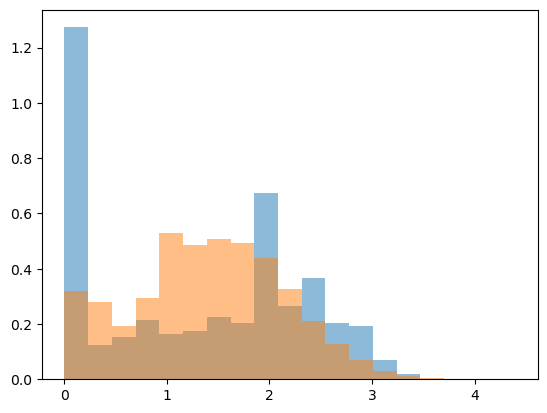

In [122]:
bins = np.linspace(0,np.log10(25000),20)
plt.hist(np.log10(amountClass[amountClass.Class==1].Amount), bins=bins, density=True, alpha=0.5)
plt.hist(np.log10(amountClass[amountClass.Class==0].Amount), bins=bins, density=True, alpha=0.5)
plt.show()

Bringing Amount and Time into the same scale as the rest of the column as not in give a single feature dominance over the other. 

May want to use log normalization

Robust Scalar: we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset

In [123]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your pandas DataFrame and 'column_to_exclude' is the column you want to exclude
column_to_exclude = 'Class'

# Drop the column to exclude
data_to_scale = data.drop(columns=[column_to_exclude])

# Apply RobustScaler to the remaining columns
rob_scaler = RobustScaler()
scaled_data = rob_scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# Concatenate the excluded column with the scaled DataFrame
data_scaled[column_to_exclude] = data[column_to_exclude]

# Now you can view the head of the scaled DataFrame
data_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,0.185689,-0.345414,-0.740209,-0.745834,-0.393775,1.152959,-0.541507,0.309758,0.029437,0.437322,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,-0.074854,1.095465,0.903686,0.383407,-0.211569,0.476970,0.400979,-0.055612,-0.179787,-0.163363,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,0.303796,0.437564,-0.072229,0.557465,-0.235704,1.865539,-2.982344,1.330783,-0.117763,-2.475385,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,0.038374,-0.128974,0.037307,0.397641,-0.368473,-0.551666,-1.135905,-0.700023,1.970088,-1.350843,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,0.855099,-0.525992,0.388903,1.036898,-1.273801,0.103149,-0.522390,-0.193970,-0.034570,0.873809,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


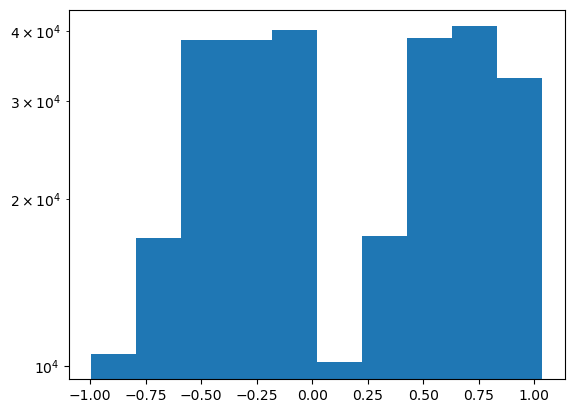

In [124]:
plt.hist(data_scaled.Time)
plt.yscale('log')

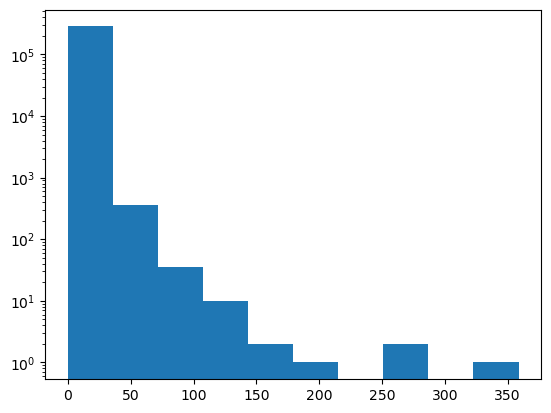

In [125]:
plt.hist(data_scaled.Amount)
plt.yscale('log')

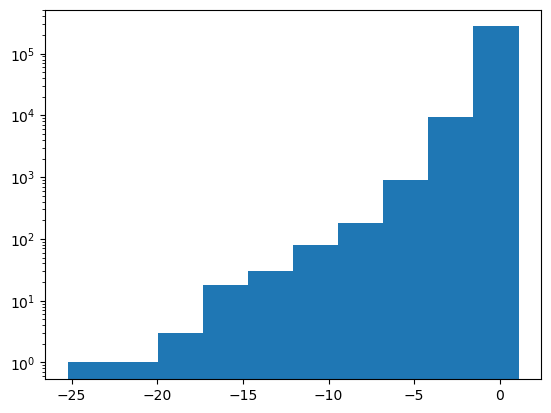

In [126]:
plt.hist(data_scaled.V1)
plt.yscale("log")

In [138]:
# in our case we may want to have detecting fraud as TP for confusion Matrix, this will allow that to happen
data_scaled["Class"] = data_scaled["Class"].apply(lambda x: 1 if x == 0 else 0)

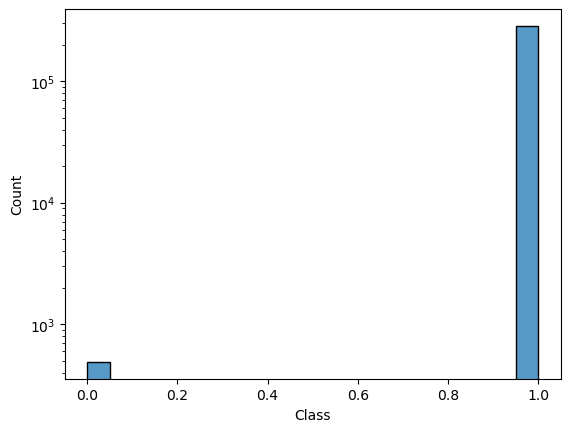

In [139]:
#data imbalance
sns.histplot(data_scaled['Class'])
plt.yscale('log')
plt.show()

In [174]:
X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
y

0         1
1         1
2         1
3         1
4         1
         ..
284802    1
284803    1
284804    1
284805    1
284806    1
Name: Class, Length: 284807, dtype: int64

In [176]:
y_train.value_counts()

1    227451
0       394
Name: Class, dtype: int64

In [177]:
y_test.value_counts()

1    56864
0       98
Name: Class, dtype: int64

In [142]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))

X_train shape: (227845, 30)
y_train shape: (227845,)
X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>


# Confusion Matrix Overview

TP  FN 

FP  TN

*TP:* Transaction is truly fraud

*FP:* Transcation flagged as fraud when it actually wasn't

*TN:* Transaction was not flagged for fraud and it is not a fradulent transaction

*FN:* Transaction was not flagged for fraud but it is fraulent

# Supervised Learning Model

## Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
def report(y_test, mod):
    # Evaluate performance using classification report
    print(classification_report(y_test, mod))

    # Evaluate performance using confusion matrix
    print(confusion_matrix(y_test, mod))

    

In [145]:
# Base model
lgm = LogisticRegression(solver='liblinear', random_state=42)
lgm.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

**Hyperparameters**

solver: {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’

- lbfgs: relatively good perform (may have issues with convergence)
- sag: faster than other for large datasets, when both the number of samples and the number of features are large
- saga: sparse multinomial logistic regression and suitable for very large datasets
- newton-cg: computationally expensive because of the Hessian Matrix
- liblinear: recommended for high dimension dataset - solving large-scale classification problems

penalty: {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

tol: tolerance to stopping (early stopping)

C: regularization strength

dual:

fit_intercept:

intercept_scaling:

class_weight: 

max_iter:

verbose:

warm_start:

n_jobs:

l1_ratio:

In [136]:
lgm.classes_

array([0, 1])

In [146]:
# Predict probabilities for the test set
y_pred_proba = lgm.predict_proba(X_test)[:, 1]

# Define different threshold values to try
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# Evaluate performance for each threshold
for threshold in thresholds:
    # Classify predictions based on the threshold
    y_pred = y_pred_proba > threshold
    
    # Generate classification report
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.91      0.71      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Threshold: 0.15
              precision    recall  f1-score   support

           0       0.83      0.44      0.57        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.91      0.72      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Threshold: 0.2
              precision    recall  f1-score   support

           0       0.83      0.45      0.58        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.91      0.72      0.79     56962
weighted avg       1.00     

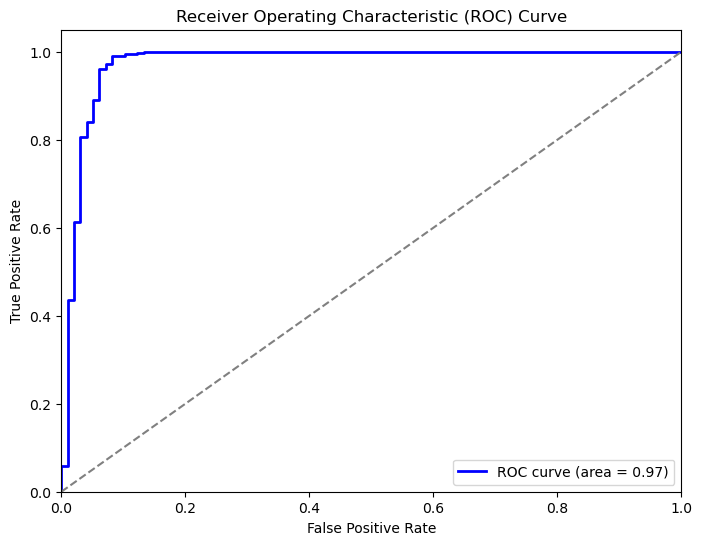

In [148]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [156]:
y_pred = lgm.predict_proba(X_test)[:,1] > 0.05# lgm.predict(X_test)

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.80      0.37      0.50        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.90      0.68      0.75     56962
weighted avg       1.00      1.00      1.00     56962

[[   36    62]
 [    9 56855]]


True:    284315

Fraudulent:       492

## K-Nearest Neighbor

**haven't gotten it to run correctly yet**

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)> 0.05
report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[   73    25]
 [    4 56860]]


## XGBoost

XGBoost: Extreme Gradient Boost is distributed-boosted gradient tree. 

- improves a single weak model by combining it with a number of other weak models to generate a collectively strong model

**xgb.train():**
- lower-level function in XGBoost that allows you to train a gradient boosting model with fine-grained control over parameters
- It requires you to explicitly define the model parameters
- Need to prepare the data beforehand and pass it to the function as DMatrix objects


- Pro: More flexibility and customization optionss
- Con: ore manual intervention and tuning

In [161]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import warnings

In [162]:
warnings.filterwarnings("ignore")

# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 5,                # Number of classes
    'eta': 0.01,                   # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'min_child_weight': 1,         # Minimum sum of instance weight required in a child
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.6,       # Subsample ratio of columns when constructing each tree
    'gamma': 0.3,                  # Minimum loss reduction required to make a further partition on a leaf node
    'lambda': 0.6,                 # L2 regularization term on weights
    'alpha': 0.2,                  # L1 regularization term on weights
    'scale_pos_weight': 0.4,       # Control the balance of positive and negative weights
    'tree_method': 'auto',       # Tree construction algorithm
    'grow_policy': 'lossguide'  
}

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
epochs = 100
bst = xgb.train(params, dtrain, epochs)

# Predictions
preds = bst.predict(dtest)> 0.05

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)


Accuracy: 0.9995435553526912


In [163]:
report(y_test, preds)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[   73    25]
 [    1 56863]]


**XGBClassifier():**
- Higher-level interface for classification tasks
- Follows the same API conventions as other classifiers in scikit-learn, (easier to use within scikit-learn pipelines and workflows)
- Handles many details internally (data preprocessing, model initialization, and parameter tuning) 
- You can directly pass the raw data (features and labels) to XGBClassifier()

In [166]:
warnings.filterwarnings("ignore")

# fit model no training data
xgc = XGBClassifier()
xgc.fit(X_train, y_train)

print(xgc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [168]:
y_pred = xgc.predict(X_test)> 0.05
# predictions = [round(value) for value in y_pred]

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[   76    22]
 [    3 56861]]


# GridSearch Example

In [169]:
xgc = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator= xgc, param_grid= param_grid, cv= 3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Test Accuracy with Best Hyperparameters: 0.9995962220427653


# SMOTE

SMOTE(*, 

*sampling_strategy*= float (only for binary), str (in our casue will use either auto or minority), dict or callable, default=’auto’,  

*random_state*= controls randomization, 

*k_neighbors*= define the neighborhood of samples
)

In [170]:
# in terminal: conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
counter = Counter(y_train_resampled)
counter

Counter({1: 227451, 0: 227451})

For Logistic Regression

In [172]:
lgm = LogisticRegression(solver='liblinear', random_state=42)
lgm.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)> 0.05

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[   77    21]
 [    2 56862]]


SMOTE on XGBoost Classifier

In [180]:
# fit model no training data
xgc = XGBClassifier()
xgc.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test) > 0.05

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[   77    21]
 [    2 56862]]


**Play Around With SMOTE**

# Boarderline SMOTE

Similar to ADASYN, looks at minority points that are on the boarder (and creates an imaginay line) with the majority points and creates more minority points along the imaginary lines


BoarderlineSMOTE(*, 

sampling_strategy= float, str, dict or callable, default=’auto’, 

random_state= Control the randomization , 

k_neighbors= used to define the neighborhood of samples, 

m_neighbors= The nearest neighbors used to determine if a minority sample is in “danger”., 

kind='borderline-1' or 'borderline-2')
- boarderline-1: oversampling along border for both classes
- boarderline-2: oversampling along boarder for **minority class**

In [181]:
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=42, kind= 'borderline-2')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
counter = Counter(y_train_resampled)

# fit model no training data
xgc = XGBClassifier()
xgc.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test) > 0.05

report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[   77    21]
 [    2 56862]]


# CV On Oversampling Models on LOG, KNN, XGBOOST (default setting)

### Log Regression ADASYN

In [217]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', LogisticRegression())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__n_neighbors': [3, 5, 7, 10, 15, 20],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test) > 0.05

# Evaluate the model
report(y_test, y_pred)


Best Parameters: {'sampling__n_neighbors': 20}
              precision    recall  f1-score   support

           0       0.02      0.93      0.05        98
           1       1.00      0.93      0.97     56864

    accuracy                           0.93     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.93      0.96     56962

[[   91     7]
 [ 3780 53084]]


In [ ]:
# Define and initialize ADASYN with the best n_neighbors
best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
adasyn = ADASYN(random_state=42, n_neighbors=best_n_neighbors)

# Resample the training data using ADASYN
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_knn = pd.concat([pd.DataFrame(X_train_resampled_ADASYN, columns=X_train.columns), pd.Series(y_train_resampled_ADASYN, name='target')], axis=1)

### KNN ADASYN

In [216]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', KNeighborsClassifier())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__n_neighbors': [3, 5, 7, 10, 15, 20],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test) > 0.05

# Evaluate the model
report(y_test, y_pred)


Best Parameters: {'sampling__n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.44      0.88      0.59        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962

[[   86    12]
 [  108 56756]]


In [ ]:
# Define and initialize ADASYN with the best n_neighbors
best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
adasyn = ADASYN(random_state=42, n_neighbors=best_n_neighbors)

# Resample the training data using ADASYN
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_knn = pd.concat([pd.DataFrame(X_train_resampled_ADASYN, columns=X_train.columns), pd.Series(y_train_resampled_ADASYN, name='target')], axis=1)

### XGBOOST

In [215]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', XGBClassifier())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__n_neighbors': [3, 5, 7, 10, 15, 20],
    # Add other hyperparameters for XGBClassifier if needed
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best n_neighbors:", grid_search.best_params_['sampling__n_neighbors'])

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)>0.05

# Evaluate the model
report(y_test, y_pred)

Best n_neighbors: 3
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[   84    14]
 [   17 56847]]


In [218]:
# Define and initialize ADASYN with the best n_neighbors
best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
adasyn = ADASYN(random_state=42, n_neighbors=best_n_neighbors)

# Resample the training data using ADASYN
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_xgboost = pd.concat([pd.DataFrame(X_train_resampled_ADASYN, columns=X_train.columns), pd.Series(y_train_resampled_ADASYN, name='target')], axis=1)

In [219]:
adasyn_xgboost['target'].value_counts()

0    227458
1    227451
Name: target, dtype: int64

# CV on Oversampling Models for XGBoost

- Cross Validation to find Best Model for each resampling model for XGBoost

### SMOTE

In [204]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define the pipeline with SMOTE and model
pipeline = Pipeline([
    ('sampling', SMOTE(random_state=42)),
    ('model', XGBClassifier())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__k_neighbors': [3, 5, 7, 10, 15, 20],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best k_neighbors:", grid_search.best_params_['sampling__k_neighbors'])

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)>0.05

# Evaluate the model
report(y_test, y_pred)

Best k_neighbors: 3
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[   83    15]
 [   17 56847]]


In [207]:
# Define and initialize SMOTE with the best n_neighbors
best_k_neighbors = grid_search.best_params_['sampling__k_neighbors']

borderlineSMOTE = SMOTE(random_state=42, k_neighbors=best_k_neighbors)

X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

# Concatenate the resampled features and target variable into a DataFrame
smote_xgboost = pd.concat([pd.DataFrame(X_train_resampled_smote, columns=X_train.columns), pd.Series(y_train_resampled_smote, name='target')], axis=1)

In [208]:
smote_xgboost['target'].value_counts()

1    227451
0    227451
Name: target, dtype: int64

### BorderlineSMOTE

In [209]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

# Define the pipeline with BorderlineSMOTE and model
pipeline = Pipeline([
    ('sampling', BorderlineSMOTE(random_state=42, kind= 'borderline-2')),
    ('model', XGBClassifier())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__k_neighbors': [3, 4, 5, 7, 10, 15, 20],
    'sampling__m_neighbors': [3, 4, 5, 7, 10, 15, 20]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best k_neighbors:", grid_search.best_params_['sampling__k_neighbors'])
print("Best m_neighbors:", grid_search.best_params_['sampling__m_neighbors'])

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)>0.05

# Evaluate the model
report(y_test, y_pred)

Best k_neighbors: 3
Best m_neighbors: 3
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[   80    18]
 [    6 56858]]


In [210]:
# Define and initialize BorderlineSMOTE with the best n_neighbors
best_k_neighbors = grid_search.best_params_['sampling__k_neighbors']
best_m_neighbors = grid_search.best_params_['sampling__m_neighbors']

borderlineSMOTE = BorderlineSMOTE(random_state=42, k_neighbors=best_k_neighbors, m_neighbors=best_m_neighbors, kind= 'borderline-2')

# Resample the training data using BorderlineSMOTE
X_train_resampled_Borderline, y_train_resampled_Borderline = borderlineSMOTE.fit_resample(X_train, y_train)

boarderline_xgboost = pd.concat([pd.DataFrame(X_train_resampled_Borderline, columns=X_train.columns), pd.Series(y_train_resampled_Borderline, name='target')], axis=1)

In [211]:
boarderline_xgboost['target'].value_counts()

1    227451
0    227451
Name: target, dtype: int64

### ADASYN

# RUN AT YOUR OWN RISK

# Looking at combining fine tuning of learning model and oversampling for ADASYN

Logistic Regression

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', LogisticRegression())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__n_neighbors': [3, 5, 7, 10, 15, 20],
    'model__C': [0.01, 0.1, 10],
    'model__penalty': ["l1", "l2"]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test) > 0.05

# Evaluate the model
report(y_test, y_pred)


In [ ]:
# Define and initialize ADASYN with the best n_neighbors
best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
adasyn = ADASYN(random_state=42, n_neighbors=best_n_neighbors)

# Resample the training data using ADASYN
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_knn = pd.concat([pd.DataFrame(X_train_resampled_ADASYN, columns=X_train.columns), pd.Series(y_train_resampled_ADASYN, name='target')], axis=1)

KNN

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', KNeighborsClassifier())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__n_neighbors': [3, 5, 7, 10, 15, 20],
    'model__n_neighbors': [3, 5, 7, 10, 15, 20],
    'model__weights': ["uniform", "distance"],
    'model__p': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test) > 0.05

# Evaluate the model
report(y_test, y_pred)


In [ ]:
# Define and initialize ADASYN with the best n_neighbors
best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
adasyn = ADASYN(random_state=42, n_neighbors=best_n_neighbors)

# Resample the training data using ADASYN
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_knn = pd.concat([pd.DataFrame(X_train_resampled_ADASYN, columns=X_train.columns), pd.Series(y_train_resampled_ADASYN, name='target')], axis=1)

### XGBoost

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', XGBClassifier())
])

# Define parameter grid for grid search
param_grid = {
    'sampling__n_neighbors': [3, 5, 7, 10, 15, 20],
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [5, 7, 9],
    'model__learning_rate': [0.1, 0.01]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test) > 0.05

# Evaluate the model
report(y_test, y_pred)

In [ ]:
# Define and initialize ADASYN with the best n_neighbors
best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
adasyn = ADASYN(random_state=42, n_neighbors=best_n_neighbors)

# Resample the training data using ADASYN
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_xgboost = pd.concat([pd.DataFrame(X_train_resampled_ADASYN, columns=X_train.columns), pd.Series(y_train_resampled_ADASYN, name='target')], axis=1)

GridSearch after ADASYN oversampling method

# Best Model Supervised Learning XGBoost

# Anomoly Detection

## DBSCAN

**may not be best for high dimensional datasets**

- eps = distance between two samples
- min_samples = minimal sample in neigbhorhood

In [ ]:
sns.histplot(data["Time"])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN
dbscan = DBSCAN(eps=4.5, min_samples=15)
clusters = dbscan.fit_predict(data_scaled)

# Identify the core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Label -1 is considered as noise by the DBSCAN algorithm
# So, anomalies are the data points not part of any clusters (noise)
anomalies = data[clusters == -1]

print('Number of anomalies detected:', len(anomalies))